## Exploratory Data Analysis on the Titanic Data Set

#### Data Description


The Titanic dataset is a widely used dataset for machine learning and data analysis, containing information about the passengers of the RMS Titanic, which sank on its maiden voyage in 1912. The dataset includes various attributes for each passenger, such as:

PassengerId: Unique identifier for each passenger.

Survived: Survival status (0 = No, 1 = Yes).

Pclass: Ticket class (1 = First, 2 = Second, 3 = Third).

Name: Name of the passenger.

Sex: Gender of the passenger.

Age: Age of the passenger.

SibSp: Number of siblings or spouses aboard the Titanic.

Parch: Number of parents or children aboard the Titanic.

Ticket: Ticket number.

Fare: Passenger fare.

Cabin: Cabin number.

Embarked: Port of embarkation (C = Cherbourg, Q = Queenstown, S = Southampton).

This dataset is commonly used for binary classification tasks, such as predicting survival, and for exploring patterns and relationships within the data, such as the impact of socio-economic status, gender, and age on survival rates.

#### Importing necessary Libraries

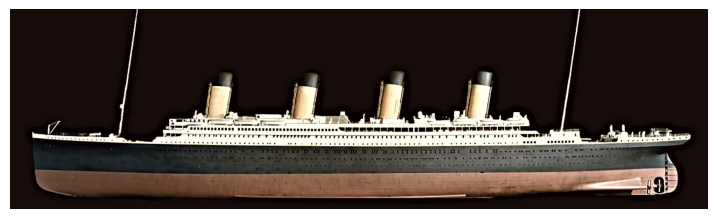

In [226]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.image as mpimg


img = mpimg.imread('Titanic_Portside_Diagram.jpg')
plt.imshow(img)
plt.axis('off')  
plt.show()

%matplotlib inline
sns.set_style(style="darkgrid")
plt.rcParams['figure.figsize']=[9.0, 6.0]   

### Loading and Previewing the dataset

In [7]:
train_df = pd.read_csv("train.csv", index_col=['PassengerId'])
df=train_df
train_df.head() 

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [454]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 891 entries, 1 to 891
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Name      891 non-null    object 
 3   Sex       891 non-null    object 
 4   Age       714 non-null    float64
 5   SibSp     891 non-null    int64  
 6   Parch     891 non-null    int64  
 7   Ticket    891 non-null    object 
 8   Fare      891 non-null    float64
 9   Cabin     204 non-null    object 
 10  Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 83.5+ KB


### Fixing Missing Data

In [10]:
mean_ages = train_df.groupby(['Sex', 'Pclass'])['Age'].mean()
display(mean_ages)

Sex     Pclass
female  1         34.611765
        2         28.722973
        3         21.750000
male    1         41.281386
        2         30.740707
        3         26.507589
Name: Age, dtype: float64

In [228]:
def replace_nan_age(row):
   if pd.isnull(row['Age']):
     return mean_ages[row['Sex'], row['Pclass']]
   else:
    return row['Age']
train_df['Age'] = train_df.apply(replace_nan_age, axis=1)
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
 12  AgeGroup     714 non-null    object 
dtypes: float64(2), int64(5), object(6)
memory usage: 90.6+ KB


In [393]:
train_df.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


#### Total Passengers On Board

In [107]:
total = len(train_df)
print(total)

891


#### Number of Survivors

In [114]:
survived = (train_df.Survived == 1).sum()
print(survived)


342


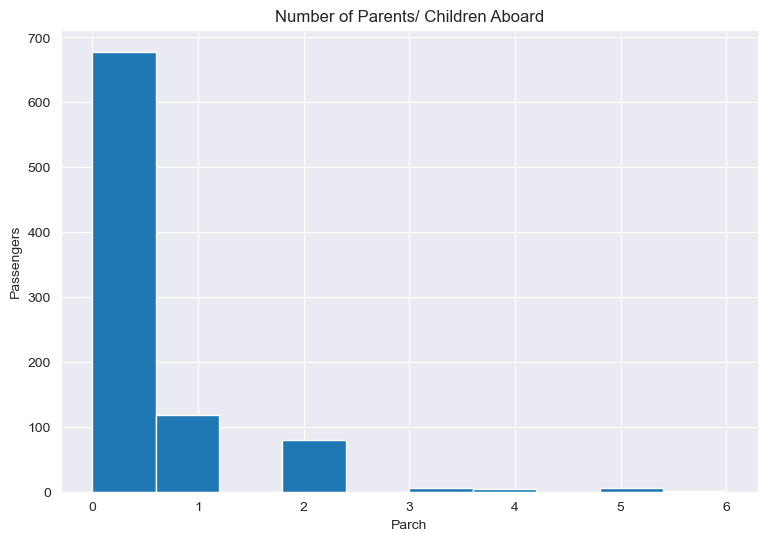

In [12]:
train_df.Parch.hist()
plt.xlabel('Parch')
plt.ylabel('Passengers')
plt.title('Number of Parents/ Children Aboard')
plt.show()

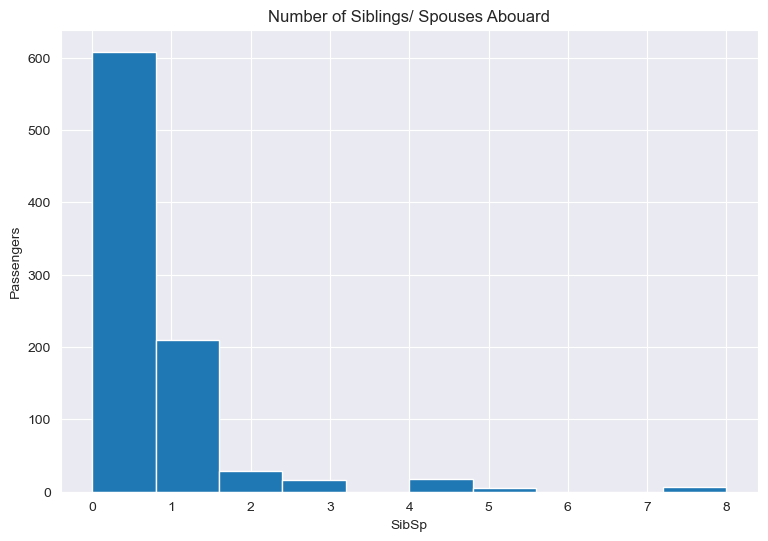

In [14]:
train_df.SibSp.hist()
plt.xlabel('SibSp')
plt.ylabel('Passengers')
plt.title('Number of Siblings/ Spouses Abouard')
plt.show()


From the train dataset of the titanic above, we notice;
- Oldest passenger: 80 years old

- Youngest passenger: Approximately 5 months old

- Average age of passengers: 29-32 (with missing ages)

- Mean survival rate: 38.38%

- Maximum fare charged: $512.33

- Maximum number of siblings/spouses: 8

- Maximum number of parents/children: 6



# QUESTIONS

1. Did the passenger class make any difference to his survival?
2. Which gender had more survivors?
3. Person traveling with others have more survival possibilities?
4. Which age group had a better chance of survival?
5. What was male and female survival per class and age?

### 1. Did the passenger class make any difference to his survival?

In [16]:
survived_plass_df=train_df[['Survived', 'Pclass']]
survived_plass_df.head()


survived_by_pclass= survived_plass_df.groupby(['Pclass']).sum()
total_by_pclass=survived_plass_df.groupby(['Pclass']).count()

total_by_pclass.rename(columns={'Survived': 'Total'}, inplace=True)


survived_total_by_pclass = pd.merge(survived_by_pclass, total_by_pclass, left_index=True, right_index=True)
 #Merge by index
survived_total_by_pclass

,Survived,Total
Pclass,,
1,136,216
2,87,184
3,119,491


In [18]:
percent_survived=(survived_total_by_pclass['Survived']/survived_total_by_pclass['Total']) * 100
survived_total_by_pclass['Percentage']=percent_survived

survived_total_by_pclass

,Survived,Total,Percentage
Pclass,,,
1,136,216,62.962963
2,87,184,47.282609
3,119,491,24.236253


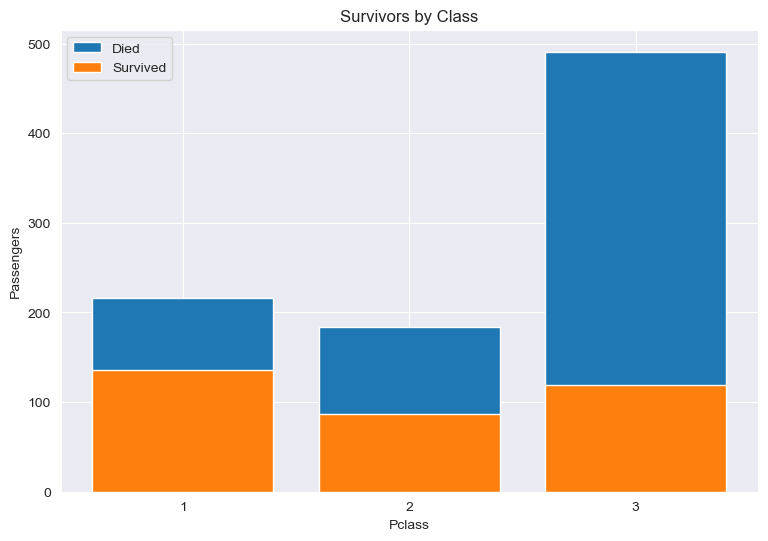

In [403]:
x=survived_total_by_pclass.index.values
ht=survived_total_by_pclass.Total
hs=survived_total_by_pclass.Survived

pht=plt.bar(x, ht)
phs=plt.bar(x, hs)

plt.xticks(x, x)
plt.xlabel('Pclass')
plt.ylabel('Passengers')
plt.title('Survivors by Class')

plt.legend([pht,phs],['Died', 'Survived'])

### Conclusion

As can be seen from the visualization and the dataframe table above, First Class passengers had the highest survival rate, followed by the Second Class passengers with Third Class having the least passenger survival rate.
A large number of passengers were travelling in Third Class(491), but only 22.24% survived.


 
 
 ## 2.Which gender had more survivors?

In [20]:
group_by_sex=train_df.groupby('Sex')

survived_by_sex=group_by_sex['Survived'].sum()
survived_by_sex.name='Survived'
display(survived_by_sex)

Total_by_sex=group_by_sex['Survived'].size()
Total_by_sex.name= 'Total'
display(Total_by_sex)


survived_total_by_sex=pd.concat([survived_by_sex, Total_by_sex], axis=1)

survived_total_by_sex

Sex
female    233
male      109
Name: Survived, dtype: int64

Sex
female    314
male      577
Name: Total, dtype: int64

,Survived,Total
Sex,,
female,233,314
male,109,577


In [407]:
percent_survived= (survived_total_by_sex['Survived']/survived_total_by_sex['Total']) *100
survived_total_by_sex['Percentage']=percent_survived

survived_total_by_sex

,Survived,Total,Percentage
Sex,,,
female,233,314,74.203822
male,109,577,18.890815


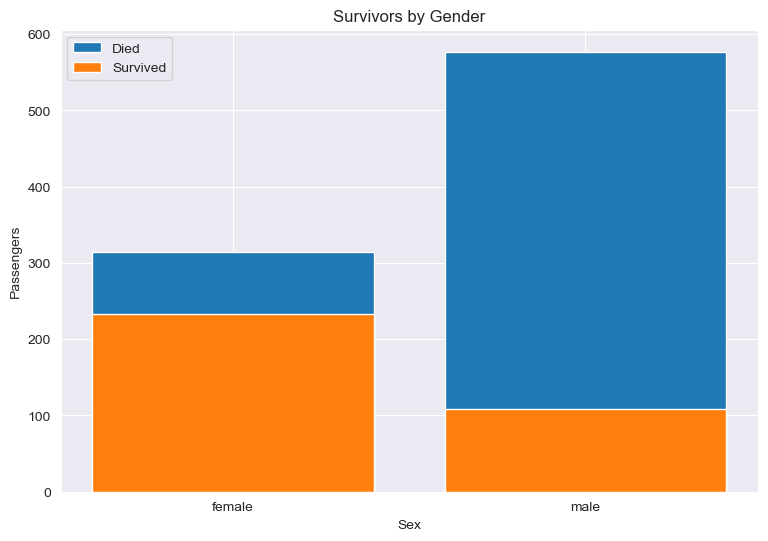

In [22]:
x=range(len(survived_total_by_sex.index.values))
ht=survived_total_by_sex.Total
hs=survived_total_by_sex.Survived

pht=plt.bar(x, ht)
phs=plt.bar(x, hs)

plt.xticks(x, survived_total_by_sex.index.values)
plt.xlabel('Sex')
plt.ylabel('Passengers')
plt.title('Survivors by Gender')

plt.legend([pht,phs],['Died', 'Survived'])


### Conclusion

Based on the visualization and survival percentages from the dataframe above, it is evident that females had a significantly higher survival rate. The survival rate for females was 74.3%, while for males it was 18.9%, making the female survival rate approximately four times higher than that of males.
It can be concluded that females were given preference in rescue operations, and males must have sacrificed themselves to let the females survive.



## 3. Person traveling with others have more survival possibilities?

In [24]:
is_not_alone=(train_df.SibSp + train_df.Parch)>=1
passengers_not_alone=train_df[is_not_alone]

is_alone=(train_df.SibSp + train_df.Parch)==0
passengers_alone=train_df[is_alone]

print('Not alone-describe')
display(passengers_not_alone.describe())
print('Alone-describe')
display(passengers_alone.describe())

Not alone-describe


,Survived,Pclass,Age,SibSp,Parch,Fare
count,354.000000,354.000000,310.000000,354.000000,354.000000,354.000000
mean,0.505650,2.169492,26.413452,1.316384,0.960452,48.832275
std,0.500676,0.864520,15.834923,1.420774,1.039512,55.307615
min,0.000000,1.000000,0.420000,0.000000,0.000000,6.495800
25%,0.000000,1.000000,16.000000,1.000000,0.000000,18.000000
50%,1.000000,2.000000,26.000000,1.000000,1.000000,27.750000
75%,1.000000,3.000000,37.000000,1.000000,2.000000,59.044800
max,1.000000,3.000000,70.000000,8.000000,6.000000,512.329200


Alone-describe


,Survived,Pclass,Age,SibSp,Parch,Fare
count,537.000000,537.000000,404.000000,537.0,537.0,537.000000
mean,0.303538,2.400372,32.220297,0.0,0.0,21.242689
std,0.460214,0.804511,12.899871,0.0,0.0,42.223510
min,0.000000,1.000000,5.000000,0.0,0.0,0.000000
25%,0.000000,2.000000,22.000000,0.0,0.0,7.775000
50%,0.000000,3.000000,29.500000,0.0,0.0,8.137500
75%,1.000000,3.000000,39.000000,0.0,0.0,15.000000
max,1.000000,3.000000,80.000000,0.0,0.0,512.329200


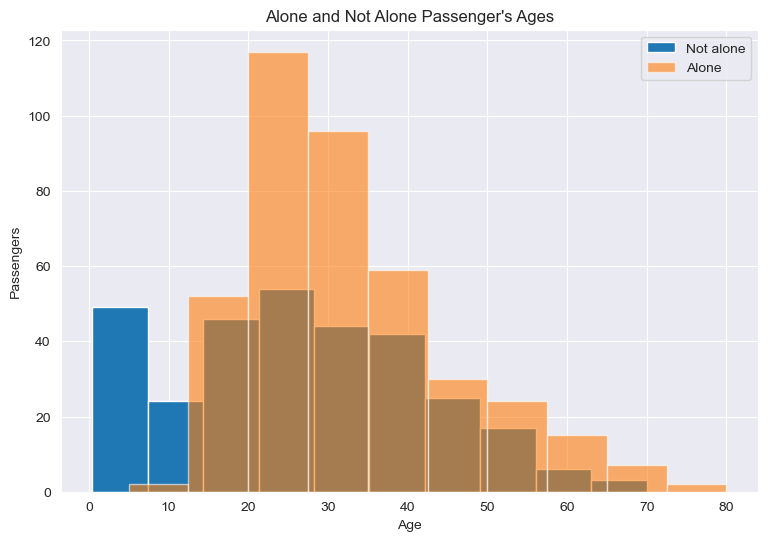

In [272]:
passengers_not_alone.Age.hist(label='Not alone')
passengers_alone.Age.hist(label='Alone', alpha=0.6)

plt.xlabel('Age')
plt.ylabel('Passengers')
plt.title('Alone and Not Alone Passenger\'s Ages')
plt.legend(loc='best')

From the above distribution, we can see that

- Those in the age range of 0-10, that is kids, were not alone- which makes sense

- There however is one old kid age 5 who is alone

- There was an 80-year-old person also who was alone

- 537 passengers were alone, whereas 345 were in company

- Except for age group 0-10, for all other age groups, those traveling alone outnumbered those traveling in company


 
 #### Reviewing their Survival

In [26]:
notalone=np.where((train_df.SibSp + train_df.Parch)>=1, 'Not Alone', 'Alone')
loneliness_summary = train_df.groupby(notalone, as_index=False)['Survived'].agg(["sum", "size"])

loneliness_summary.rename(columns={'sum': 'Survived', 'size': 'Total'}, inplace=True)

(loneliness_summary)


,index,Survived,Total
0,Alone,163,537
1,Not Alone,179,354


In [458]:
loneliness_summary['Percent survived'] = (loneliness_summary.Survived/ loneliness_summary.Total)*100

loneliness_summary

,index,Survived,Total,Percent survived
0,Alone,163,537,30.353818
1,Not Alone,179,354,50.564972


#### Visualizing

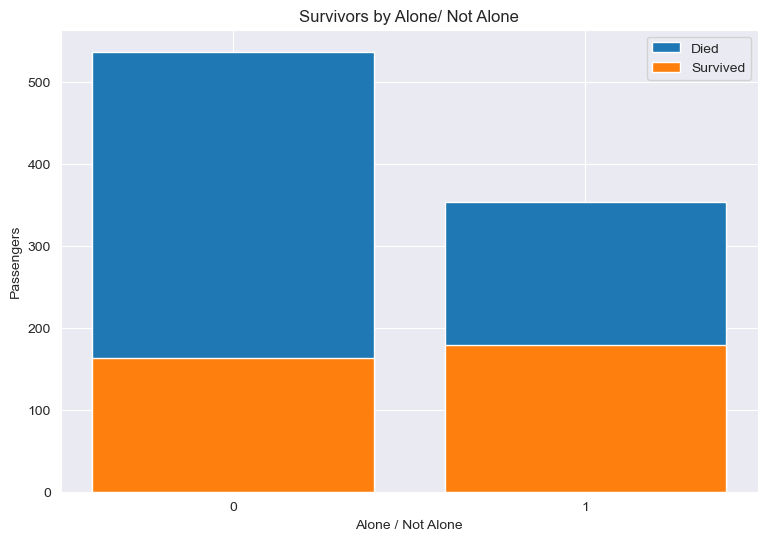

In [28]:
x = range(len(loneliness_summary.index.values))
ht = loneliness_summary.Total
hs =loneliness_summary.Survived

pht=plt.bar(x, ht)
phs=plt.bar(x, hs)

plt.xticks(x, loneliness_summary.index.values)
plt.xlabel('Alone / Not Alone')
plt.ylabel('Passengers')
plt.title('Survivors by Alone/ Not Alone')

plt.legend([pht,phs],['Died', 'Survived'])


### Conclusion
The visualization clearly indicates that people with company had a higher survival rate.





## 4. Which age group had a better chance of survival?

In [30]:
male_ages = train_df[train_df.Sex == 'male']['Age']
male_ages.describe()             

count    453.000000
mean      30.726645
std       14.678201
min        0.420000
25%       21.000000
50%       29.000000
75%       39.000000
max       80.000000
Name: Age, dtype: float64

In [32]:
female_ages = train_df[train_df.Sex == 'female']['Age']
female_ages.describe()     

count    261.000000
mean      27.915709
std       14.110146
min        0.750000
25%       18.000000
50%       27.000000
75%       37.000000
max       63.000000
Name: Age, dtype: float64

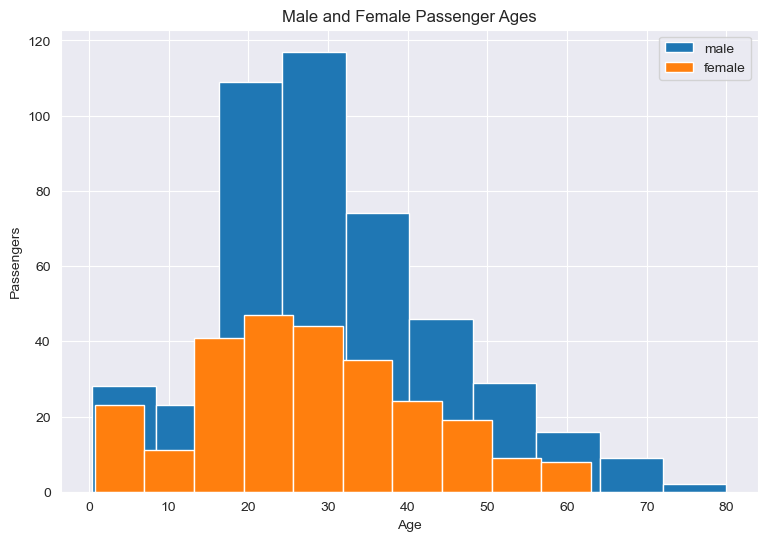

In [320]:
male_ages.hist(label='male')
female_ages.hist(label='female')

plt.xlabel('Age')
plt.ylabel('Passengers')
plt.title('Male and Female Passenger Ages')
plt.legend(loc='best')

 From the above  distribution, we can see that
 
       1. For every age group the number of females was less than the number of males
       2. The age of the oldest woman is 60



### Survival Analysis By Age Group

In [54]:
def age_group(age):
    if age >= 80:
        return '80-89'
    if age >= 70:
        return '70-79'
    if age >= 60:
        return '60-69'
    if age >= 50:
        return '50-59'
    if age >= 40:
        return '40-49'
    if age >= 30:
        return '30-39'
    if age >= 20:
        return '20-29'
    if age >= 10:
        return '10-19'
    if age >= 0:
        return '0-9'

train_df['AgeGroup'] = train_df['Age'].apply(age_group)
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,AgeGroup
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,20-29
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,30-39
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,20-29
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,30-39
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,30-39


In [87]:
age_group_summary = train_df.groupby(['AgeGroup'], as_index=True)['Survived'].agg(['sum', 'size'])
age_group_summary = age_group_summary.rename(columns={'sum': 'Survived', 'size': 'Total'})

age_group_summary

,Survived,Total
AgeGroup,,
0-9,38,62
10-19,41,102
20-29,77,220
30-39,73,167
40-49,34,89
50-59,20,48
60-69,6,19
70-79,0,6
80-89,1,1


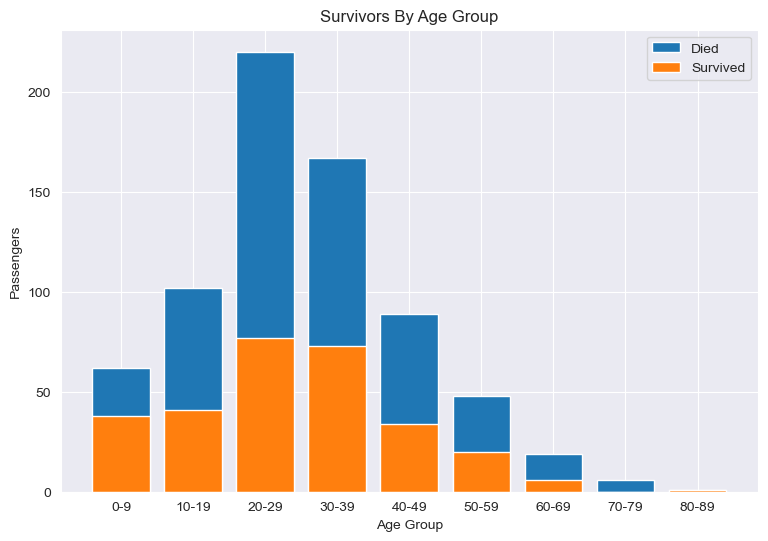

In [89]:
x = range(len(age_group_summary.index.values))
ht = age_group_summary.Total
hs = age_group_summary.Survived

pht=plt.bar(x, ht)
phs=plt.bar(x, hs)

plt.xticks(x, age_group_summary.index.values)
plt.xlabel('Age Group')
plt.ylabel('Passengers')
plt.title('Survivors By Age Group')

plt.legend([pht,phs],['Died', 'Survived'])


In [176]:

age_group_summary['SurvivedPercent'] = (age_group_summary['Survived'] / age_group_summary['Total']) * 100
age_group_summary['DiedPercent'] = ((age_group_summary['Total'] - age_group_summary['Survived']) / age_group_summary['Total']) * 100

age_group_summary


,Survived,Total,SurvivedPercent,DiedPercent
AgeGroup,,,,
0-9,38,62,61.290323,38.709677
10-19,41,102,40.196078,59.803922
20-29,77,220,35.000000,65.000000
30-39,73,167,43.712575,56.287425
40-49,34,89,38.202247,61.797753
50-59,20,48,41.666667,58.333333
60-69,6,19,31.578947,68.421053
70-79,0,6,0.000000,100.000000
80-89,1,1,100.000000,0.000000




Based on the visualization and percentages, it's clear that the majority of survivors were between the ages of 20 and 29. Interestingly, the survival rate for the 0-9 age group is the highest at 61.29%. Additionally, we noticed that females had a better survival rate, so it's important to consider both male and female survival rates for a comprehensive view.

In [100]:
sex_agegroup_summary= train_df.groupby(['Sex', 'AgeGroup'], as_index=False)['Survived'].mean()
sex_agegroup_summary

,Sex,AgeGroup,Survived
0,female,0-9,0.633333
1,female,10-19,0.755556
2,female,20-29,0.722222
3,female,30-39,0.833333
4,female,40-49,0.687500
5,female,50-59,0.888889
6,female,60-69,1.000000
7,male,0-9,0.593750
8,male,10-19,0.122807
9,male,20-29,0.168919


In [102]:
male_agegroup_summary = sex_agegroup_summary[sex_agegroup_summary['Sex']=='male']
sex_agegroup_summary

,Sex,AgeGroup,Survived
0,female,0-9,0.633333
1,female,10-19,0.755556
2,female,20-29,0.722222
3,female,30-39,0.833333
4,female,40-49,0.687500
5,female,50-59,0.888889
6,female,60-69,1.000000
7,male,0-9,0.593750
8,male,10-19,0.122807
9,male,20-29,0.168919


In [48]:

train_df = pd.read_csv("train.csv", index_col=False)

In [64]:
female_agegroup_summary = sex_agegroup_summary[sex_agegroup_summary['Sex']=='female']
sex_agegroup_summary

,Sex,AgeGroup,Survived
0,female,0-9,0.633333
1,female,10-19,0.755556
2,female,20-29,0.722222
3,female,30-39,0.833333
4,female,40-49,0.687500
5,female,50-59,0.888889
6,female,60-69,1.000000
7,male,0-9,0.593750
8,male,10-19,0.122807
9,male,20-29,0.168919


In [72]:
age_group = train_df.AgeGroup.unique()
age_group = [age for age in age_group if pd.notna(age)]
age_labels = sorted(age_group)
print(age_labels)

['0-9', '10-19', '20-29', '30-39', '40-49', '50-59', '60-69', '70-79', '80-89']


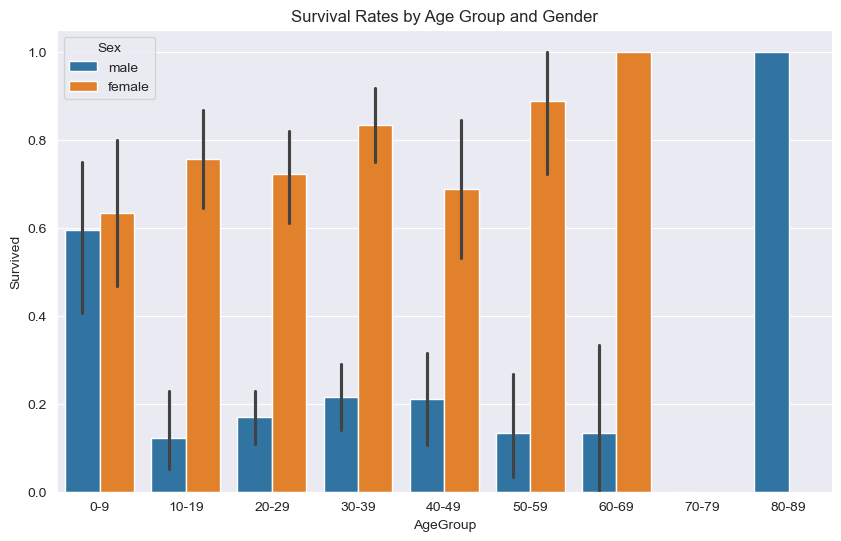

In [104]:

plt.figure(figsize=(10, 6))
ax = sns.barplot(x='AgeGroup', y='Survived', data=train_df, hue='Sex', order=age_labels)

plt.title("Survival Rates by Age Group and Gender")
plt.show()



#### Conclusion
Based on the proportions and visualizations, it is evident that female and children received priority in rescue operations by male passengers. 

Both male and female children in the 0-9 age group had a very high rate of survival.




## 5.What was male and female survival per class and age?

#### Male and Female Per Pclass

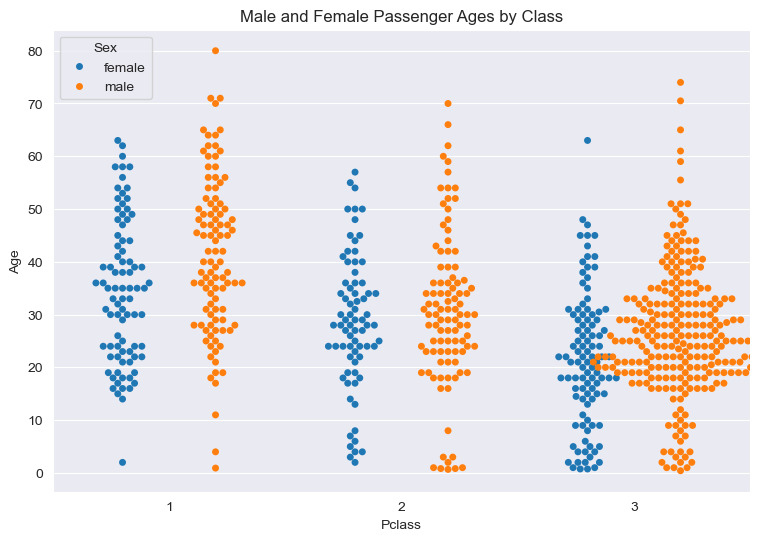

In [130]:
sns.swarmplot(x='Pclass', y='Age', data=train_df, hue='Sex', dodge=True)

plt.title("Male and Female Passenger Ages by Class")
plt.show()

Looking at the data, we can see that there were more passengers in third class compared to first and second class. Specifically, there was a large number of male passengers, with the majority being between the ages of 18 and 32.

Text(0.5, 1.0, 'Comparison of Male and Female Passenger Ages by Class')

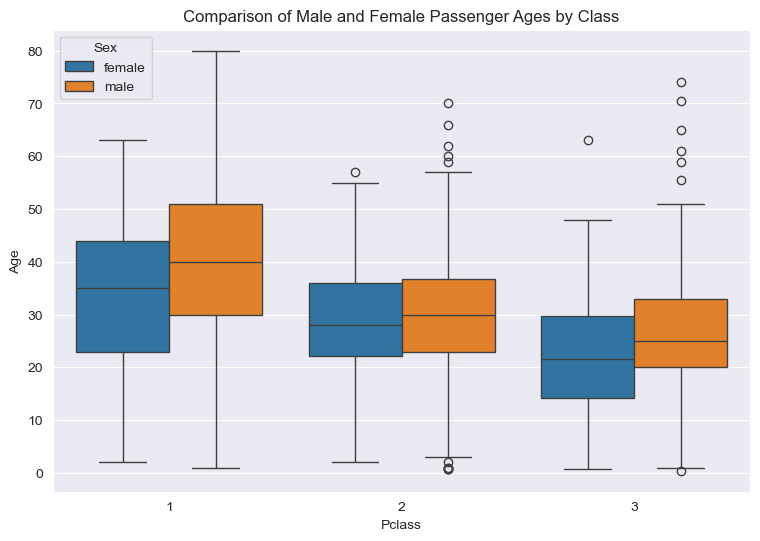

In [174]:


sns.boxplot(x='Pclass', y='Age', data=train_df, hue='Sex').set_title("Comparison of Male and Female Passenger Ages by Class")


Based on the data, it's clear that the average age of male and female passengers in the 3rd class was lower than that of males and females in the 2nd and 1st class. 

The highest average age of males was in the 1st class. However, this plot only provides insight into the age distribution of males and females within each class.


### Male and Female Survival Per Pclass and by Age

In [155]:

def scatter(passengers, marker, legend_prefix):
    survived = passengers[passengers.Survived == 1]
    died = passengers[passengers.Survived == 0]

    x = survived.Age
    y = survived.Fare
    plt.scatter(x, y, c='blue', alpha=0.5, marker=marker, label=legend_prefix + ' Survived')

    
    x = died.Age
    y = died.Fare
    plt.scatter(x, y, c='red', alpha=0.5, marker=marker, label=legend_prefix + ' Died')

def scatter_by_class(pclass):
    class_passengers = train_df[train_df.Pclass == pclass]

    male_passengers = class_passengers[class_passengers.Sex == 'male']
    female_passengers = class_passengers[class_passengers.Sex == 'female']

    scatter(male_passengers, marker='o', legend_prefix='Male ')
    scatter(female_passengers, marker='^', legend_prefix='Female ')

    plt.legend(bbox_to_anchor=(1, 1), loc='upper left')  # bbox_to_anchor moves the legend out of the plot
    plt.xlabel('Age')
    plt.ylabel('Fare')
    plt.title('Gender survival by Age, for Pclass = ' + str(pclass))
    plt.show()



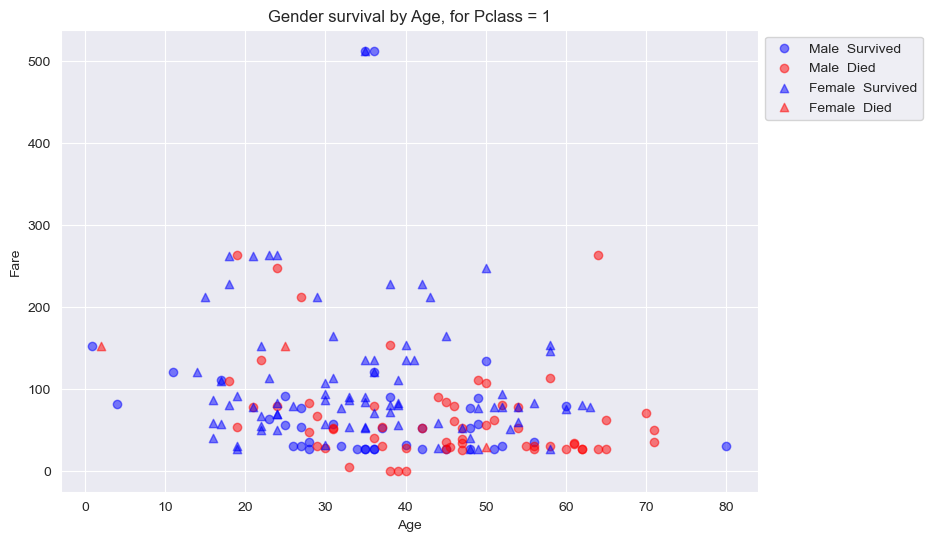

In [157]:
scatter_by_class(1)

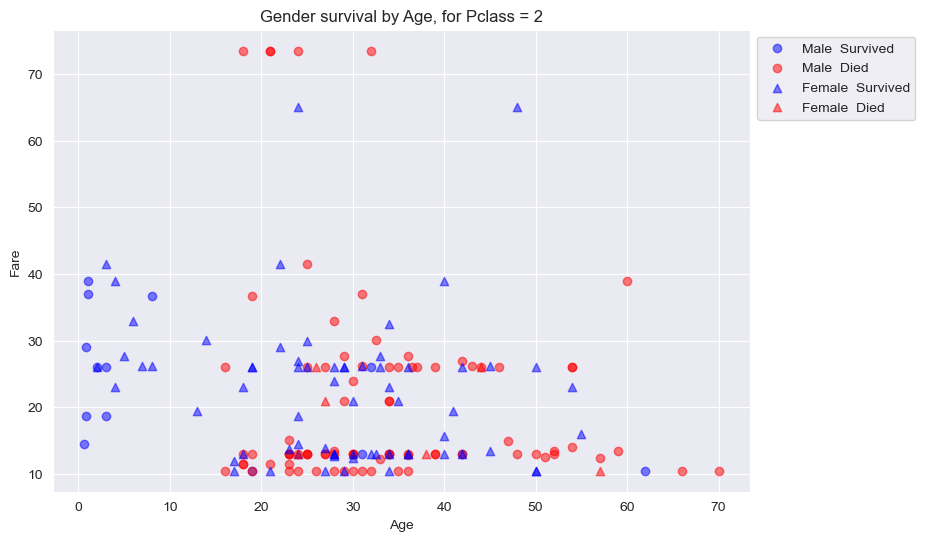

In [159]:
scatter_by_class(2)

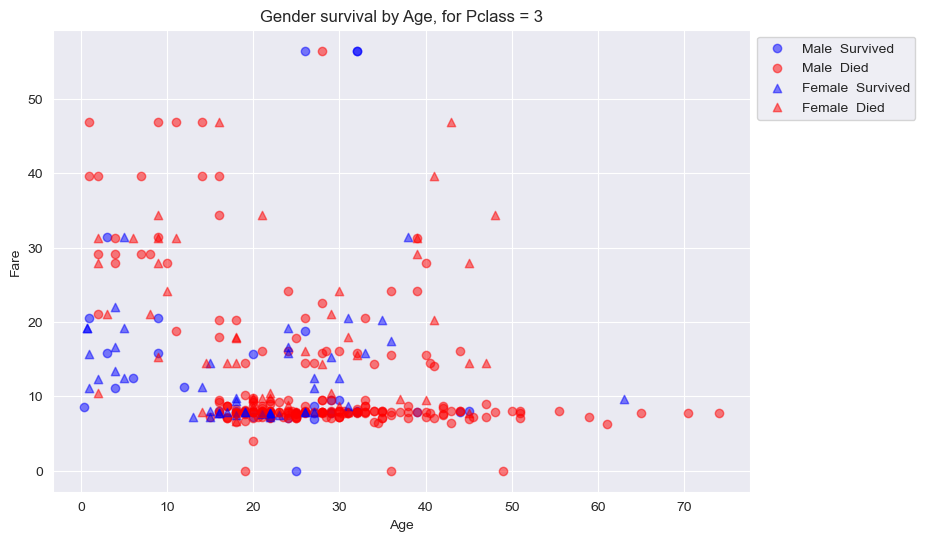

In [164]:
scatter_by_class(3)

The three scatter plots above provide a visualization of the relationship between age, gender, and survival rate in each passenger class.




#### Conclusion
From the scatter plots above, we can see a clear picture of the age spread and survival rates for males and females. Here's what we can observe:
- Females in first and second class had a high survival rate.
- In the first and second class, male and female children (aged 0-10) almost all survived.
- In the third class, the survival rate for females was higher than for males, but it was lower compared to the survival rate of females in the first and second class.

We can confirm the observation mentioned above by creating a bar plot that shows the survival rate by class and sex.

Text(0.5, 1.0, 'Gender Survival by Class')

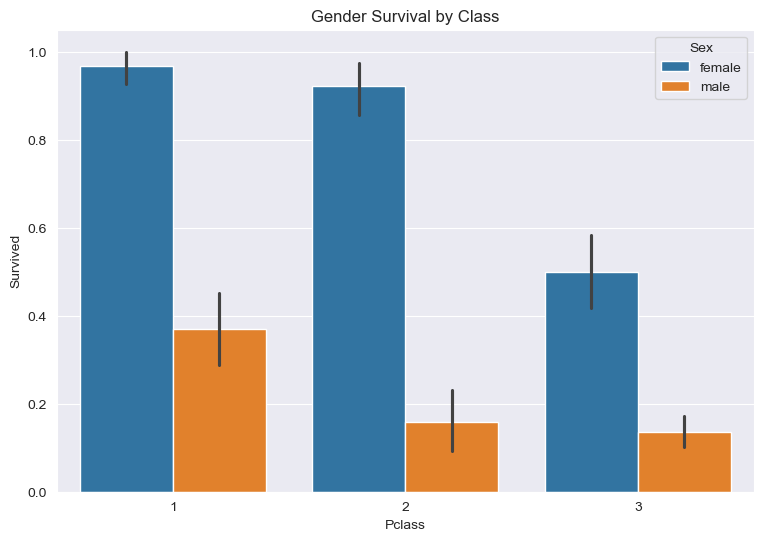

In [195]:
sns.barplot(x='Pclass', y='Survived', data=train_df, hue='Sex').set_title("Gender Survival by Class")




## Overall Conclusion

### Findings
In the Titanic disaster, the survival rate for females was 74.3% while for males it was 18.9%, indicating that females were about four times more likely to survive than males. As a result, females and children were given priority in rescue operations and were likely saved by other male passengers.

Additionally, 62.96% of 1st class passengers survived, while only 24.24% of 3rd class passengers survived, which is about one-third of the survival rate of 1st class passengers. This suggests that first class passengers received preferential treatment due to their social status.

Furthermore, 50% of passengers travelling with family members survived, compared to a 30% survival rate for those travelling alone. This indicates that passengers travelling with family had a higher chance of survival than those travelling alone.

Lastly, it's worth noting that children had higher survival rates than adults.



### Future Plans
Please take note of the following text:
 
Future work or potential areas to explore:

- The analysis only utilized 3 parameters - Age, Sex, and Passenger Class. Further analysis is possible.
- Additional questions that can be explored include:
  - Did individuals with higher fares have a better chance of survival?
  - Did the deck of the cabin affect the rate of survival?
  - Is there any correlation between survival and a person's title (e.g., Mr., Mrs., Miss, etc.)?





  ### Thank You!
  
 ##### By: Ruth O. Ajagunna